In [1]:
import gt4py as gt
from gt4py import gtscript
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams["font.size"] = 16

/users/class170/HPC4WC_venv/lib/python3.9/site-packages/setuptools/distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


In [24]:
# grid size
nx = 10
ny = 10
nz=1

backend='numpy'

# storage shape
shape = (nx, ny, nz)

# default origin (trust it for now!)
default_origin = (0, 0, 0)

# allocate an empty storage
hMidx = gt.storage.empty(backend, default_origin, (nx-1, ny-1, nz), dtype=float)

In [25]:
def compute_staggered(
    h: gtscript.Field[float],
    hMidx: gtscript.Field[float],
    ):
    from __gtscript__ import PARALLEL, computation, interval
    
    with computation(PARALLEL), interval(...):

        # Mid-point value for h along x
            hMidx = 0.5 * (h[1, 0,0] + h[0,0,0])        

Text(0.5, 1.0, 'initial field')

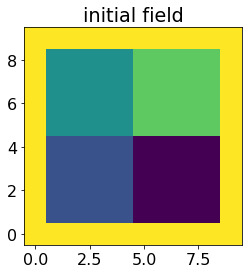

In [26]:
h_np = np.zeros(shape)
h_np[:5,:5,:] = 1
h_np[:5,5:,:] = 2
h_np[5:,5:,:] = 3
h_np[0,:,:] = 4
h_np[:,0,:] = 4
h_np[:,-1,:] = 4
h_np[-1,:,:] = 4
plt.imshow(h_np[:,:,0].T, origin='lower')
plt.title('initial field')

In [27]:
h = gt.storage.from_array(h_np, backend, default_origin)
test_it = gtscript.stencil(definition=compute_staggered, backend=backend)

Text(0.5, 1.0, 'staggered field')

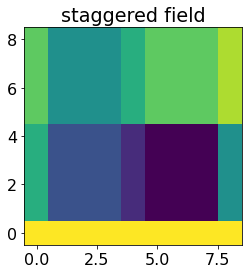

In [28]:
test_it(h, 
    hMidx,
    origin=(0,0,0), domain=(nx-1, ny-1, nz)) ### test with ny instead of ny-1
plt.imshow(np.asarray(hMidx[:,:,0]).T, origin='lower')
plt.title('staggered field')

In [23]:
hMidx.shape, h_np.shape

((9, 9, 1), (10, 10, 1))